# Asset Pricing Assignment: Question 3

In [25]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import statsmodels.api as sm
from scipy.stats import f
from scipy.stats import t

3a. Theory-based question.

3b. Check whether there is any abnormal return variation across portfolios of stocks with different investment growth rates. Estimate the CAPM for each of the 10 portfolios and plot the CAPM $\alpha$'s against investment deciles.

In [26]:
# read file F-F_Research_Data_Factors.CSV
dfff = pd.read_csv('F-F_Research_Data_Factors.CSV', sep=',')

# rename column 0 as 'Date'
dfff.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

# read Date as integer
dfff['Date'] = dfff['Date'].astype(int)

dfff.head()

,Date,Mkt-RF,SMB,HML,RF
0,196307,-0.39,-0.45,-0.97,0.27
1,196308,5.07,-0.98,1.80,0.25
2,196309,-1.57,-0.33,0.13,0.27
3,196310,2.53,-0.58,-0.10,0.29
4,196311,-0.85,-1.17,1.75,0.27


In [27]:
dfff.shape

(732, 5)

In [28]:
# read file Portfolios_Formed_on_INV_Cleaned_MktR.CSV
dfinv = pd.read_csv('Portfolios_Formed_on_INV_Cleaned_MktR.csv', skiprows=1, sep=',')

# rename column 0 as 'Date'
dfinv.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

# read Date as integer
dfinv['Date'] = dfinv['Date'].astype(int)

print('Raw Returns:')
print(dfinv.head())

print('Excess Returns:')

# get excess returns of 10 decile portfolios
for column in dfinv.columns[1:-1]:
    dfinv[column] = dfinv[column] - dfff['RF']

dfinv.head()

Raw Returns:
     Date  Lo 30  Med 40  Hi 30  Lo 20  Qnt 2  Qnt 3  Qnt 4  Hi 20  Lo 10  \
0  196307  -1.14    0.32   0.43  -1.61  -0.11   0.60   0.27   0.55  -2.34   
1  196308   5.84    5.02   5.54   6.07   5.35   5.45   4.53   6.47   5.40   
2  196309  -1.43   -1.09  -1.08  -0.62  -1.39  -2.44  -0.48  -1.33  -0.83   
3  196310   2.28    1.70   5.98   2.66   0.93   1.32   3.22   7.39   2.91   
4  196311   0.39    0.02  -2.04   0.74  -1.12  -1.42   0.88  -3.47   1.85   

   Dec-02  Dec-03  Dec-04  Dec-05  Dec-06  Dec-07  Dec-08  Dec-09  Hi 10  \
0   -0.69   -0.12   -0.10    1.04    0.25    0.25    0.30    0.49   0.73   
1    6.90    5.34    5.36    5.64    5.30    4.54    4.51    6.05   7.72   
2   -0.37   -3.21   -0.32   -2.76   -2.18   -0.26   -0.80   -1.15  -1.85   
3    2.37    1.41    0.66    0.95    1.61    2.41    4.41    8.41   4.38   
4   -0.62   -0.40   -1.53   -1.80   -1.11    1.77   -0.40   -4.39  -0.64   

   Mkt-RF  
0   -0.39  
1    5.07  
2   -1.57  
3    2.53  
4   -0.

,Date,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec-02,Dec-03,Dec-04,Dec-05,Dec-06,Dec-07,Dec-08,Dec-09,Hi 10,Mkt-RF
0,196307,-1.41,0.05,0.16,-1.88,-0.38,0.33,0.00,0.28,-2.61,-0.96,-0.39,-0.37,0.77,-0.02,-0.02,0.03,0.22,0.46,-0.39
1,196308,5.59,4.77,5.29,5.82,5.10,5.20,4.28,6.22,5.15,6.65,5.09,5.11,5.39,5.05,4.29,4.26,5.80,7.47,5.07
2,196309,-1.70,-1.36,-1.35,-0.89,-1.66,-2.71,-0.75,-1.60,-1.10,-0.64,-3.48,-0.59,-3.03,-2.45,-0.53,-1.07,-1.42,-2.12,-1.57
3,196310,1.99,1.41,5.69,2.37,0.64,1.03,2.93,7.10,2.62,2.08,1.12,0.37,0.66,1.32,2.12,4.12,8.12,4.09,2.53
4,196311,0.12,-0.25,-2.31,0.47,-1.39,-1.69,0.61,-3.74,1.58,-0.89,-0.67,-1.80,-2.07,-1.38,1.50,-0.67,-4.66,-0.91,-0.85


In [29]:
dfinv.shape

(732, 20)

In [30]:
# estimate the CAPM for 10 portfolios
CAPM_results = {}

# assume homoskedasticity
for model in dfinv.columns[9:19]:
    x = dfinv[['Mkt-RF']]
    x = sm.add_constant(x)
    CAPM_results[model] = sm.OLS(dfinv[model], x).fit()

CAPM_results

{'Lo 10': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x77b067832ea0>,
 'Dec-02': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x77b0678697f0>,
 'Dec-03': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x77b065650e00>,
 'Dec-04': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x77b0656a3c80>,
 'Dec-05': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x77b0656a2870>,
 'Dec-06': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x77b0656a06b0>,
 'Dec-07': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x77b0656a3800>,
 'Dec-08': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x77b0656a2120>,
 'Dec-09': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x77b0656a3fe0>,
 'Hi 10': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x77b0656a1010>}

In [31]:
# extract alphas from regression results
alpha_list = []

for key in CAPM_results:
    a = CAPM_results[key]
    alpha_list.append({"Portfolio": key, "Alpha": round(a.params['const'], 2)})

alphas = pd.DataFrame(alpha_list)
display(alphas)

,Portfolio,Alpha
0,Lo 10,0.17
1,Dec-02,0.23
2,Dec-03,0.20
3,Dec-04,0.10
4,Dec-05,0.11
5,Dec-06,0.06
6,Dec-07,0.07
7,Dec-08,0.05
8,Dec-09,-0.01
9,Hi 10,-0.29


In [32]:
# plot CAPM alphas against investment deciles
deciles_list = []
x = range(10, 101, 10)
for n in x:
    deciles_list.append(n)

deciles = pd.DataFrame(deciles_list)
alpha_plot = pd.concat([deciles, alphas],axis=1,ignore_index=True)
alpha_plot = alpha_plot.rename(columns={0: "Decile", 1: "Portfolio", 2: "Alpha"})
alpha_plot.drop(['Portfolio'],axis=1,inplace=True)

alpha_plot

,Decile,Alpha
0,10,0.17
1,20,0.23
2,30,0.20
3,40,0.10
4,50,0.11
5,60,0.06
6,70,0.07
7,80,0.05
8,90,-0.01
9,100,-0.29


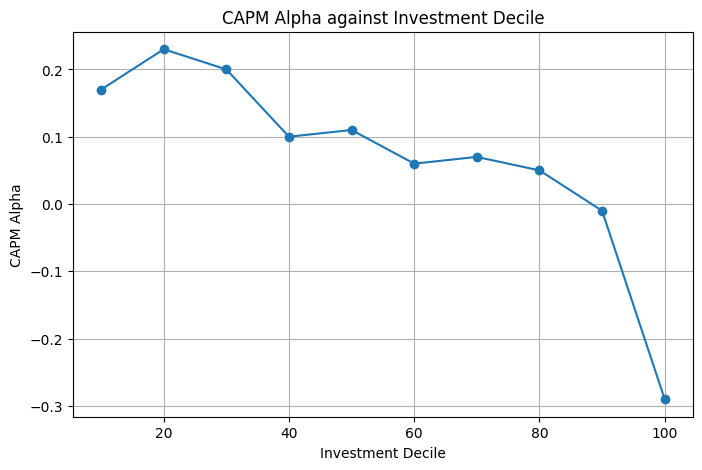

In [33]:
# plot CAPM alphas against investment deciles
plt.figure(figsize=(8, 5))
plt.plot(alpha_plot['Decile'], alpha_plot['Alpha'], marker='o', linestyle='-')

plt.xlabel('Investment Decile')
plt.ylabel('CAPM Alpha')
plt.title('CAPM Alpha against Investment Decile')
plt.grid(True)
plt.show()

3c. Theory-based question.

3d. Consider the classic Fama-French model and its extension that includes the investment growth factor. Estimate the two models given by eq. (1) and (2) on the 25 portfolios used in Question (1). For each model, report in a table the adjusted R2, α and its corresponding t-statistics. Then, again for each model, report the GRS test statistics and the corresponding p-value. Compare your results for the two models.

In [34]:
# create INV (investment growth factor)
dfinv["INV"] = (dfinv["Lo 30"] - dfinv["Hi 30"])

dfinv

,Date,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,...,Dec-03,Dec-04,Dec-05,Dec-06,Dec-07,Dec-08,Dec-09,Hi 10,Mkt-RF,INV
0,196307,-1.41,0.05,0.16,-1.88,-0.38,0.33,0.00,0.28,-2.61,...,-0.39,-0.37,0.77,-0.02,-0.02,0.03,0.22,0.46,-0.39,-1.57
1,196308,5.59,4.77,5.29,5.82,5.10,5.20,4.28,6.22,5.15,...,5.09,5.11,5.39,5.05,4.29,4.26,5.80,7.47,5.07,0.30
2,196309,-1.70,-1.36,-1.35,-0.89,-1.66,-2.71,-0.75,-1.60,-1.10,...,-3.48,-0.59,-3.03,-2.45,-0.53,-1.07,-1.42,-2.12,-1.57,-0.35
3,196310,1.99,1.41,5.69,2.37,0.64,1.03,2.93,7.10,2.62,...,1.12,0.37,0.66,1.32,2.12,4.12,8.12,4.09,2.53,-3.70
4,196311,0.12,-0.25,-2.31,0.47,-1.39,-1.69,0.61,-3.74,1.58,...,-0.67,-1.80,-2.07,-1.38,1.50,-0.67,-4.66,-0.91,-0.85,2.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,202402,3.86,2.45,8.83,3.71,2.19,3.94,5.96,9.71,4.72,...,4.00,1.08,3.88,4.01,1.70,7.95,3.59,12.98,5.07,-4.97
728,202403,4.19,2.41,2.63,4.25,1.65,3.53,2.82,3.09,4.86,...,4.13,0.09,4.19,2.61,4.34,2.15,2.70,3.28,2.83,1.56
729,202404,-5.64,-3.07,-5.92,-6.65,-3.94,-2.04,-5.71,-5.75,-8.72,...,-4.70,-3.44,-0.34,-4.42,-4.82,-6.11,-5.93,-5.66,-4.67,0.28
730,202405,2.81,3.39,6.29,2.25,4.53,2.44,4.20,7.34,2.26,...,3.33,5.30,3.06,1.53,2.00,5.19,3.11,9.40,4.34,-3.48


In [35]:
# create extended Fama-French Factors matrix
dfff_extended = dfff[['Date','SMB','HML','RF']]

# add INV column
dfff_extended = pd.merge(dfff_extended, dfinv, on="Date")
dfff_extended = dfff_extended[["Date","Mkt-RF", "SMB", "HML", "INV","RF"]]

dfff.head()

,Date,Mkt-RF,SMB,HML,RF
0,196307,-0.39,-0.45,-0.97,0.27
1,196308,5.07,-0.98,1.80,0.25
2,196309,-1.57,-0.33,0.13,0.27
3,196310,2.53,-0.58,-0.10,0.29
4,196311,-0.85,-1.17,1.75,0.27


In [36]:
# read file 25_Portfolios_Cleaned.csv
df25p = pd.read_csv('25_Portfolios_Cleaned.csv', sep=',')

# rename column 0 as 'Date'
df25p.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

# read Date as integer
df25p['Date'] = df25p['Date'].astype(int)

print('Raw Returns:')
print(df25p.head())

print('Excess Returns:')

# get excess returns for 25 portfolios
for column in df25p.columns[1:]:
    df25p[column] = df25p[column] - dfff_extended['RF']

df25p.tail()

Raw Returns:
     Date  ME1 BM1  ME1 BM2  ME1 BM3  ME1 BM4  ME1 BM5  ME2 BM1  ME2 BM2  \
0  196307   1.1307  -0.3091   0.7079   0.1062  -1.3211  -1.8071   0.1899   
1  196308   4.2370   1.3834   1.4977   2.3755   4.7567   5.5665   4.5191   
2  196309  -2.8878   0.6263  -1.0204  -1.6000  -0.4320  -4.0502  -1.5034   
3  196310   1.2885  -0.7071   1.3132   0.0855   2.3988   1.1916   4.2342   
4  196311  -3.3751  -3.7534  -1.8055  -1.0487  -1.0538  -4.2561  -1.7534   

   ME2 BM3  ME2 BM4  ...  ME4 BM1  ME4 BM2  ME4 BM3  ME4 BM4  ME4 BM5  \
0  -1.0105  -1.9644  ...  -0.9806  -1.6781  -1.9184  -1.5741  -1.8567   
1   4.4424   4.4188  ...   5.4259   4.7306   6.2332   7.6782   5.3469   
2  -0.8798  -1.1812  ...  -2.7974  -2.0801  -1.7800  -3.9639  -1.9943   
3   2.3524   2.2012  ...  -0.3902   0.6829   2.6229   4.8492   0.6113   
4  -0.7809  -0.1002  ...  -0.8798  -0.6434  -0.7933   1.3610   3.5388   

   ME5 BM1  ME5 BM2  ME5 BM3  ME5 BM4  ME5 BM5  
0   0.1547   0.4833   1.2286  -0.5862  -1.

,Date,ME1 BM1,ME1 BM2,ME1 BM3,ME1 BM4,ME1 BM5,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,ME5 BM1,ME5 BM2,ME5 BM3,ME5 BM4,ME5 BM5
727,202402,9.3215,6.3990,11.3072,2.2084,3.8553,9.2445,6.2036,6.7660,3.9033,...,6.6618,7.6348,3.2897,4.1891,2.1229,5.6499,1.0896,7.6569,4.5735,2.4889
728,202403,-3.7123,1.1675,0.3170,1.2694,4.2800,-0.3284,1.9809,2.1231,2.3958,...,3.4048,4.2532,4.7087,7.7568,7.2353,1.2413,5.8597,3.2374,5.7107,8.5563
729,202404,-13.0128,-7.6561,-7.9804,-7.9124,-8.0168,-7.2979,-8.7422,-6.8110,-6.0808,...,-6.1889,-6.8962,-6.4723,-7.3261,-6.2037,-4.4696,0.7208,-4.9422,-5.4638,-5.9445
730,202405,6.8393,2.8121,4.4908,3.1165,4.3490,4.1544,2.7902,5.0656,4.4027,...,2.1254,1.7390,1.9487,4.8526,3.1667,5.5412,3.7588,2.6122,3.6084,3.8259
731,202406,-4.7089,-2.7302,-6.0055,-2.0509,-2.9688,-2.3293,-2.4870,-2.4715,-1.9464,...,-1.0171,-2.1718,-2.6953,-2.0711,-3.1647,5.7072,0.6973,-0.0874,-2.0792,0.2003


In [37]:
# regression for classic 3-factor Fama-French model
FF_classic = {}

# assume homoskedasticity
for portfolio in df25p.columns[1:]:
    x = dfff_extended[['Mkt-RF','SMB','HML']]
    x = sm.add_constant(x)
    FF_classic[portfolio] = sm.OLS(df25p[portfolio], x).fit()

FF_classic

{'ME1 BM1': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x77b067868740>,
 'ME1 BM2': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x77b0677cffb0>,
 'ME1 BM3': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x77b064d83680>,
 'ME1 BM4': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x77b064d82600>,
 'ME1 BM5': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x77b064d816d0>,
 'ME2 BM1': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x77b064d832c0>,
 'ME2 BM2': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x77b064d82e70>,
 'ME2 BM3': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x77b064d81d60>,
 'ME2 BM4': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x77b064d76960>,
 'ME2 BM5': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x77b064d1c680>,
 'ME3 BM1': <statsmodels.regression.linear_model.RegressionR

In [38]:
# regression for Fama-French model with INV
FF_extended = {}

# assume homoskedasticity
for portfolio in df25p.columns[1:]:
    x = dfff_extended[['Mkt-RF','SMB','HML','INV']]
    x = sm.add_constant(x)
    FF_extended[portfolio] = sm.OLS(df25p[portfolio], x).fit()

FF_extended

{'ME1 BM1': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x77b067e13fb0>,
 'ME1 BM2': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x77b064d82c90>,
 'ME1 BM3': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x77b064d81a00>,
 'ME1 BM4': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x77b064d496a0>,
 'ME1 BM5': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x77b064d49d30>,
 'ME2 BM1': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x77b064d497c0>,
 'ME2 BM2': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x77b064d4a270>,
 'ME2 BM3': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x77b064d483e0>,
 'ME2 BM4': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x77b064d48530>,
 'ME2 BM5': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x77b064d4ad20>,
 'ME3 BM1': <statsmodels.regression.linear_model.RegressionR

In [39]:
# report adjusted R-squared, alphas, t-statistics for classic Fama-French model
ffclassic_r2_dict = {}
ffclassic_alpha_dict = {}
ffclassict_const_dict = {}
#ffclassict_mktrf_dict = {}
#ffclassict_smb_dict = {}
#ffclassict_hml_dict = {}

for key in FF_classic:
    res = FF_classic[key]
    ffclassic_r2_dict[key] = round(res.rsquared_adj,5)
    ffclassic_alpha_dict[key] = round(res.params['const'], 3)
    ffclassict_const_dict[key] = round(res.tvalues['const'], 2)
    #ffclassict_mktrf_dict[key] = round(res.tvalues['Mkt-RF'], 2)
    #ffclassict_smb_dict[key] = round(res.tvalues['SMB'], 2)
    #ffclassict_hml_dict[key] = round(res.tvalues['HML'], 2)

ffclassic = pd.DataFrame({"Adjusted R-squared": ffclassic_r2_dict, "Alpha": ffclassic_alpha_dict, "t-statistic (Alpha)": ffclassict_const_dict})
ffclassic

#significant_counts = (ffclassic['t-statistic (Alpha)'].abs() > 1.96).sum()
#print(significant_counts)

,Adjusted R-squared,Alpha,t-statistic (Alpha)
ME1 BM1,0.90608,-0.524,-5.67
ME1 BM2,0.92629,-0.014,-0.19
ME1 BM3,0.94792,-0.033,-0.62
ME1 BM4,0.95041,0.132,2.70
ME1 BM5,0.90687,0.171,2.36
ME2 BM1,0.94256,-0.211,-3.26
ME2 BM2,0.94662,0.008,0.15
ME2 BM3,0.92997,0.064,1.15
ME2 BM4,0.94574,0.059,1.26
ME2 BM5,0.95366,0.000,0.00


In [40]:
# report adjusted R-squared, alphas, t-statistics for extended Fama-French model with INV regressor
ffextended_r2_dict = {}
ffextended_alpha_dict = {}
ffextendedt_const_dict = {}
#ffextendedt_mktrf_dict = {}
#ffextendedt_smb_dict = {}
#ffextendedt_hml_dict = {}
#ffextendedt_inv_dict = {}

for key in FF_extended:
    res = FF_extended[key]
    ffextended_r2_dict[key] = round(res.rsquared_adj,5)
    ffextended_alpha_dict[key] = round(res.params['const'], 3)
    ffextendedt_const_dict[key] = round(res.tvalues['const'], 2)
    #ffextendedt_mktrf_dict[key] = round(res.tvalues['Mkt-RF'], 2)
    #ffextendedt_smb_dict[key] = round(res.tvalues['SMB'], 2)
    #ffextendedt_hml_dict[key] = round(res.tvalues['HML'], 2)
    #ffextendedt_inv_dict[key] = round(res.tvalues['INV'], 2)

ffextended = pd.DataFrame({"Adjusted R-squared": ffextended_r2_dict, "Alpha": ffextended_alpha_dict, "t-statistic (Alpha)": ffextendedt_const_dict})
ffextended

significant_counts = (ffextended['t-statistic (Alpha)'].abs() > 1.96).sum()
print(significant_counts)

6


In [41]:
# adjusted R^2, alphas, t-statistics for both models
dfallstats = pd.DataFrame({"Classic Model Adjusted R-squared": ffclassic_r2_dict, "Classic Model Alpha": ffclassic_alpha_dict, "Classic Model t-statistic (Alpha)": ffclassict_const_dict, "Extended Model Adjusted R-squared": ffextended_r2_dict, "Extended Model Alpha": ffextended_alpha_dict, "Extended Model t-statistic (Alpha)": ffextendedt_const_dict})

dfallstats

,Classic Model Adjusted R-squared,Classic Model Alpha,Classic Model t-statistic (Alpha),Extended Model Adjusted R-squared,Extended Model Alpha,Extended Model t-statistic (Alpha)
ME1 BM1,0.90608,-0.524,-5.67,0.90614,-0.517,-5.59
ME1 BM2,0.92629,-0.014,-0.19,0.92619,-0.013,-0.18
ME1 BM3,0.94792,-0.033,-0.62,0.94785,-0.032,-0.61
ME1 BM4,0.95041,0.132,2.70,0.95040,0.135,2.74
ME1 BM5,0.90687,0.171,2.36,0.90688,0.167,2.30
ME2 BM1,0.94256,-0.211,-3.26,0.94260,-0.216,-3.32
ME2 BM2,0.94662,0.008,0.15,0.94727,-0.002,-0.03
ME2 BM3,0.92997,0.064,1.15,0.93013,0.059,1.06
ME2 BM4,0.94574,0.059,1.26,0.94586,0.055,1.17
ME2 BM5,0.95366,0.000,0.00,0.95359,0.000,0.00


In [42]:
# GRS test for both models 

# Fama-French classic model

# convert alphas into DataFrame
alphahat_classic = pd.DataFrame([ffclassic_alpha_dict])

# create var-cov matrix for residuals and invert (25x25)
ffclassic_resid =np.zeros((df25p.shape[0],25))
i=0
for key in FF_classic:
    res = FF_classic[key]
    ffclassic_resid[:,i] = res.resid
    i = i+1

# not bias corrected
# sigmahat_classic = np.cov(ffclassic_resid, rowvar=False, bias=True)
# bias corrected
sigmahat_classic = np.cov(ffclassic_resid, rowvar=False, bias=True)
sigmahat_classic_inv = pd.DataFrame(np.linalg.inv(sigmahat_classic))

# create omega hat var-cov matrix for factors and invert (3x3)
omegahat_classic_numpy = dfff_extended[["Mkt-RF", "SMB", "HML"]].to_numpy()
# not bias corrected
# omegahat_classic = np.cov(omegahat_classic_numpy, rowvar=False, bias=True)
# bias corrected
omegahat_classic = np.cov(omegahat_classic_numpy, rowvar=False, bias=True)
omegahat_classic_inv = pd.DataFrame(np.linalg.inv(omegahat_classic))

# create ET(f) column vector
mean_mktrf = dfff_extended["Mkt-RF"].mean()
mean_smb = dfff_extended["SMB"].mean()
mean_hml = dfff_extended["HML"].mean()

etf_classic = pd.DataFrame([mean_mktrf,mean_smb,mean_hml])

# Fama-French extended model

# convert alphas into DataFrame
alphahat_extended = pd.DataFrame([ffextended_alpha_dict])

# create var-cov matrix for residuals and invert (25x25)
ffextended_resid =np.zeros((df25p.shape[0],25))
i=0
for key in FF_extended:
    res = FF_extended[key]
    ffextended_resid[:,i] = res.resid
    i = i+1

# not bias corrected
# sigmahat_extended = np.cov(ffextended_resid, rowvar=False, bias=True)
# bias corrected
sigmahat_extended = np.cov(ffextended_resid, rowvar=False)
sigmahat_extended_inv = pd.DataFrame(np.linalg.inv(sigmahat_extended))

# create omega hat variance matrix and invert (4x4)
omegahat_extended_numpy = dfff_extended[["Mkt-RF", "SMB", "HML","INV"]].to_numpy()
# not bias corrected
# omegahat_extended = np.cov(omegahat_extended_numpy, rowvar=False, bias=True)
# bias corrected
omegahat_extended = np.cov(omegahat_extended_numpy, rowvar=False)
omegahat_extended_inv = pd.DataFrame(np.linalg.inv(omegahat_extended))

# create ET(f) column vector
mean_mktrf = dfff_extended["Mkt-RF"].mean()
mean_smb = dfff_extended["SMB"].mean()
mean_hml = dfff_extended["HML"].mean()
mean_inv = dfff_extended["INV"].mean()

etf_extended = pd.DataFrame([mean_mktrf,mean_smb,mean_hml,mean_inv])


# define argument for GRS test stat
# N: number of portfolios, K: number of regressors, T: number of periods
# .values strips index to avoid matrices not aligned
def grs_test(N, K, T, alphahat, sigmahatinv, etf, omegahatinv):
    grs_stat = ((T-N-K)/N) * (alphahat.values @ sigmahatinv.values @ alphahat.T.values) / (1 + etf.T @ omegahatinv @ etf)
    grs_p_value = 1 - f.cdf(grs_stat, N, T-N-K)
    print(round(grs_stat,5))
    print(round(grs_p_value.item(),11))
    

# Fama-French classic model GRS test
print("F-F Classic Model:")
grs_test(25, 3, df25p.shape[0], alphahat_classic, sigmahat_classic_inv, etf_classic, omegahat_classic_inv)

# Fama-French extended model GRS test
print("F-F Extended Model:")
grs_test(25, 4, df25p.shape[0], alphahat_extended, sigmahat_extended_inv, etf_extended, omegahat_extended_inv)

F-F Classic Model:
         0
0  3.87056
1.28e-09
F-F Extended Model:
         0
0  3.99342
4.5e-10


In [43]:
# compare mean, variance of 4 F-F model factors

for factor in dfff_extended:
    print(str(factor))
    print(dfff_extended[str(factor)].mean())
    print(round(dfff_extended[str(factor)].var(),2))

Date
199356.5
3106455.71
Mkt-RF
0.5785655737704918
20.16
SMB
0.16154371584699456
9.29
HML
0.2798770491803279
8.97
INV
0.1790437158469945
6.71
RF
0.36336065573770493
0.07


In [44]:
# betas of INV factor
inv_betas_dict = {}
inv_betas_t = {}
inv_betas_p = {}
df = df25p.shape[0] - 5
sig_lvl = 0.05

for key in FF_extended:
    res = FF_extended[key]
    inv_betas_dict[key] = round(res.params['INV'],2)
    inv_betas_t[key] = round(res.tvalues['INV'], 2)
    inv_betas_p[key] = round(t.cdf(res.tvalues['INV'], df),2)

critical_value = t.ppf(sig_lvl, df)

inv_betas = pd.DataFrame({"INV Betas": inv_betas_dict, "t-statistic": inv_betas_t, "p-value": inv_betas_p})

display(inv_betas)

significant_counts = (inv_betas['t-statistic'] < critical_value).sum()
print('Critical value is ', critical_value)
print(significant_counts)


,INV Betas,t-statistic,p-value
ME1 BM1,-0.06,-1.22,0.11
ME1 BM2,-0.01,-0.22,0.41
ME1 BM3,-0.00,-0.13,0.45
ME1 BM4,-0.02,-0.91,0.18
ME1 BM5,0.04,1.02,0.85
ME2 BM1,0.04,1.19,0.88
ME2 BM2,0.09,3.16,1.00
ME2 BM3,0.05,1.65,0.95
ME2 BM4,0.04,1.64,0.95
ME2 BM5,-0.00,-0.01,0.50


Critical value is  -1.64695228516365
4
